In [3]:
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
from mplsoccer.pitch import Pitch
import pandas as pd
from pandas import json_normalize
import numpy as np
import requests

In [4]:
events = requests.get('https://raw.githubusercontent.com/statsbomb/open-data/master/data/events/9948.json')
events = events.json()

df=json_normalize(events, sep="_")

In [8]:
pd.set_option("display.max.columns",None)

df.head(5)

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,tactics_lineup,related_events,location,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,pass_end_location,pass_body_part_id,pass_body_part_name,pass_type_id,pass_type_name,carry_end_location,pass_switch,pass_outcome_id,pass_outcome_name,ball_receipt_outcome_id,ball_receipt_outcome_name,interception_outcome_id,interception_outcome_name,under_pressure,counterpress,pass_cross,pass_assisted_shot_id,pass_shot_assist,shot_statsbomb_xg,shot_end_location,shot_key_pass_id,shot_outcome_id,shot_outcome_name,shot_technique_id,shot_technique_name,shot_body_part_id,shot_body_part_name,shot_type_id,shot_type_name,shot_freeze_frame,goalkeeper_type_id,goalkeeper_type_name,goalkeeper_outcome_id,goalkeeper_outcome_name,goalkeeper_technique_id,goalkeeper_technique_name,goalkeeper_position_id,goalkeeper_position_name,goalkeeper_body_part_id,goalkeeper_body_part_name,dribble_outcome_id,dribble_outcome_name,duel_type_id,duel_type_name,duel_outcome_id,duel_outcome_name,dribble_overrun,goalkeeper_end_location,foul_committed_type_id,foul_committed_type_name,foul_committed_advantage,foul_won_advantage,ball_recovery_recovery_failure,foul_committed_offensive,clearance_aerial_won,shot_first_time,pass_aerial_won,pass_backheel,foul_committed_card_id,foul_committed_card_name,bad_behaviour_card_id,bad_behaviour_card_name,pass_miscommunication,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name,pass_goal_assist,shot_one_on_one,shot_aerial_won,foul_won_defensive
0,62b95a47-e3e7-47eb-a6a4-4ad7eac4009a,1,1,00:00:00.000,0,0,1,0.000,35,Starting XI,217,Barcelona,1,Regular Play,217,Barcelona,433.0,"[{'player': {'id': 20055, 'name': 'Marc-André ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ea03246b-4264-4526-aea3-89b2fbd8faec,2,1,00:00:00.000,0,0,1,0.000,35,Starting XI,217,Barcelona,1,Regular Play,210,Real Sociedad,4231.0,"[{'player': {'id': 7069, 'name': 'Miguel Ángel...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,44a69b91-c642-40b1-a615-db11054b3adb,3,1,00:00:00.000,0,0,1,0.000,18,Half Start,217,Barcelona,1,Regular Play,217,Barcelona,NaN,NaN,[11493e75-0d53-4489-8ccf-a2d2752661ec],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11493e75-0d53-4489-8ccf-a2d2752661ec,4,1,00:00:00.000,0,0,1,0.000,18,Half Start,217,Barcelona,1,Regular Play,210,Real Sociedad,NaN,NaN,[44a69b91-c642-40b1-a615-db11054b3adb],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,577a60d2-e469-4b7d-9b68-b0011da2f351,5,1,00:00:00.968,0,0,2,2.756,30,Pass,210,Real Sociedad,9,From Kick Off,210,Real Sociedad,NaN,NaN,[0f648804-fdf7-4d4f-b165-80b47eee9d

In [25]:
barcelona_shots = df.loc[(df['type_name'] == 'Shot') & (df['team_name']=='Barcelona')]

Text(0.5, 1.0, 'Barcelona shots')

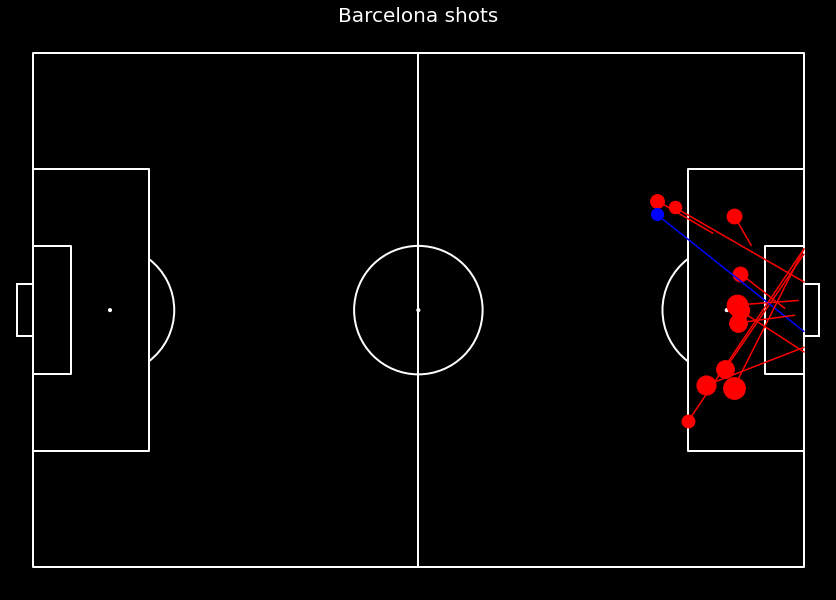

In [35]:
fig, ax=plt.subplots(figsize=(15.6,10.4))
fig.set_facecolor('black')
ax.patch.set_facecolor('black')

pitch = Pitch(pitch_type='statsbomb',orientation='horizontal', positional=False,positional_color='grey',
           pitch_color='black',line_color='white', goal_type='box',constrained_layout=True,tight_layout=False)

pitch.draw(ax=ax)

for x in range(len(barcelona_shots['id'])):
    if barcelona_shots['period'].iloc[x] == 1 or barcelona_shots['period'].iloc[x] == 2:
        size=np.sqrt(barcelona_shots['shot_statsbomb_xg'].iloc[x])*1000
        
        if barcelona_shots['shot_outcome_name'].iloc[x]=='Goal':
            plt.plot((barcelona_shots['location'].iloc[x][0],barcelona_shots['shot_end_location'].iloc[x][0]),\
                     (barcelona_shots['location'].iloc[x][1],barcelona_shots['shot_end_location'].iloc[x][1]), color = 'blue')
            plt.scatter(barcelona_shots['location'].iloc[x][0], barcelona_shots['location'].iloc[x][1], s = size, color = 'blue')
        
        else:
            
            plt.plot((barcelona_shots['location'].iloc[x][0], barcelona_shots['shot_end_location'].iloc[x][0]),\
                     (barcelona_shots['location'].iloc[x][1], barcelona_shots['shot_end_location'].iloc[x][1]), color = 'red')
            plt.scatter(barcelona_shots['location'].iloc[x][0], barcelona_shots['location'].iloc[x][1], s = size, color = 'red')
        
plt.title('Barcelona shots',color = 'white',size = 20)